In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import torch

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


## Checking image and segmentation files

In [2]:
root_dir = "kits23/dataset/case_00019/"
imaging_filename = "imaging.nii.gz"
segmentation_filename = "segmentation.nii.gz"

img = nib.load(os.path.join(root_dir, imaging_filename))
seg = nib.load(os.path.join(root_dir, segmentation_filename))
print(img.shape, type(img))
print(seg.shape, type(seg))

(129, 512, 512) <class 'nibabel.nifti1.Nifti1Image'>
(129, 512, 512) <class 'nibabel.nifti1.Nifti1Image'>


In [3]:
# access it into numpy data
img_data = img.get_fdata()
seg_data = seg.get_fdata()
print(img_data.shape, type(img_data))
print(seg_data.shape, type(seg_data))

(129, 512, 512) <class 'numpy.ndarray'>
(129, 512, 512) <class 'numpy.ndarray'>


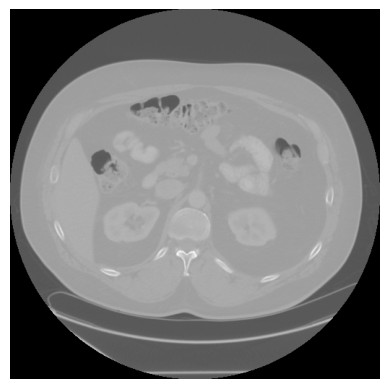

In [4]:
idx = 40
plt.imshow(img_data[idx], cmap="gray")
plt.axis("off")
plt.show()

In [5]:
np.unique(img_data[idx])

array([-2048., -1024., -1023., ...,  1030.,  1076.,  1095.])

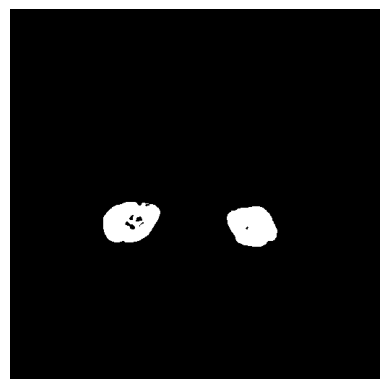

In [6]:
plt.imshow(seg_data[idx], cmap="gray")
plt.axis("off")
plt.show()

In [7]:
np.unique(seg_data[idx])

array([0., 1.])

## Checking instances & annotations

kidney_instance-1_annotation-1.nii.gz (129, 512, 512)


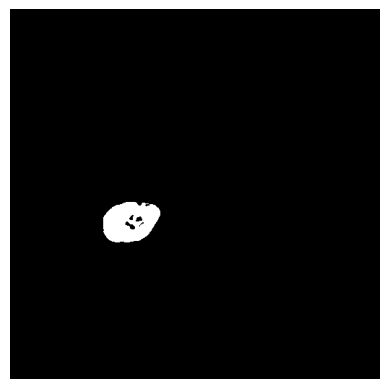

kidney_instance-1_annotation-2.nii.gz (129, 512, 512)


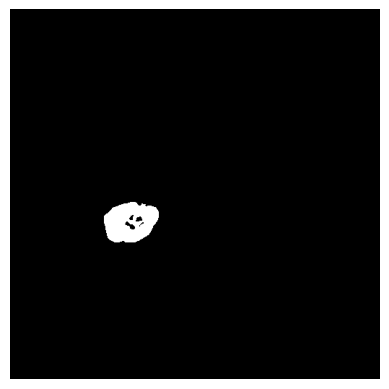

kidney_instance-1_annotation-3.nii.gz (129, 512, 512)


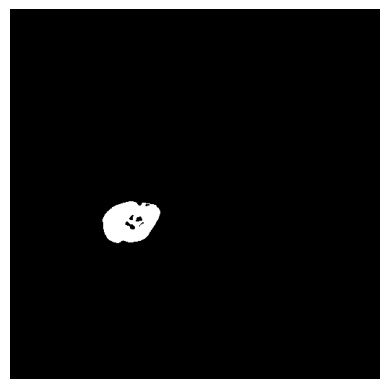

kidney_instance-2_annotation-1.nii.gz (129, 512, 512)


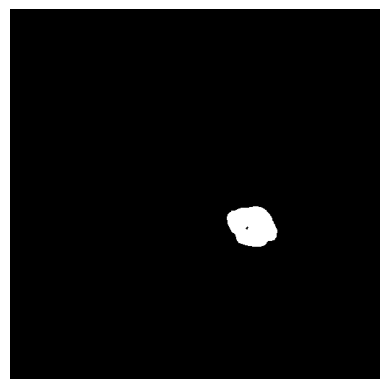

kidney_instance-2_annotation-2.nii.gz (129, 512, 512)


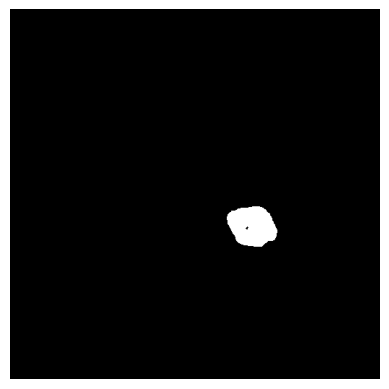

kidney_instance-2_annotation-3.nii.gz (129, 512, 512)


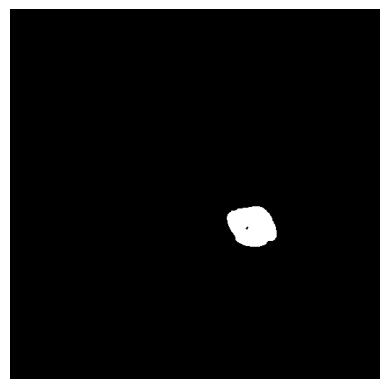

tumor_instance-1_annotation-1.nii.gz (129, 512, 512)


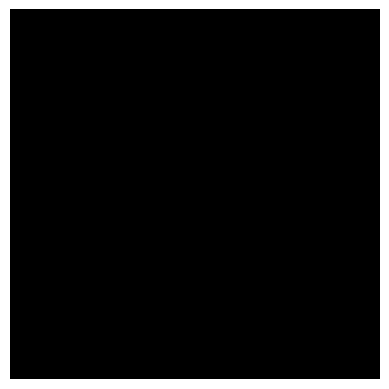

tumor_instance-1_annotation-2.nii.gz (129, 512, 512)


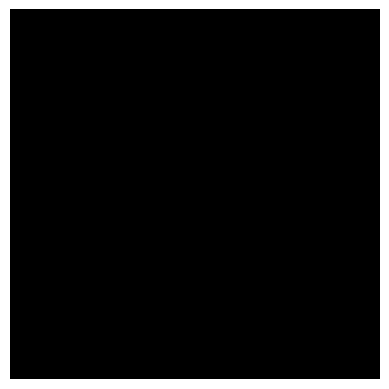

tumor_instance-1_annotation-3.nii.gz (129, 512, 512)


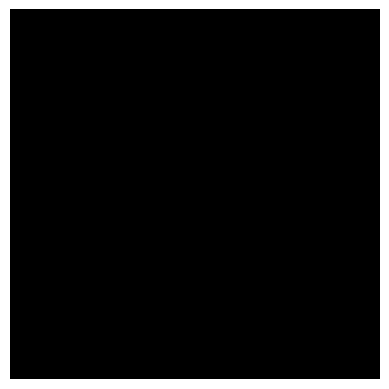

In [8]:
for filename in sorted(os.listdir(os.path.join(root_dir, "instances"))):
    full_path = os.path.join(root_dir, "instances", filename)
    img = nib.load(full_path)
    img_data = img.get_fdata()
    print(filename, img_data.shape)
    plt.imshow(img_data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

## Collect instance and annotation names

In [9]:
import re
def filter_dataset(file_list):
    filtered_files = []
    seen_prefixes = set()

    for file in file_list:
        # Skip files without "annotation"
        if "annotation" not in file:
            filtered_files.append(file)
            continue

        # Extract the prefix (e.g., "tumor_instance-1")
        match = re.search(r'(.*?)_annotation', file)
        if match:
            prefix = match.group(1)

            # Add the file if the prefix hasn't been seen before
            if prefix not in seen_prefixes:
                filtered_files.append(file)
                seen_prefixes.add(prefix)
    return filtered_files

def get_nii_gz_data(directory):
  """
  Finds all .nii.gz files within a directory, including subdirectories.

  Args:
    directory: The directory to search.

  Returns:
    nii_gz_dict: A list of paths to all .nii.gz files found in a dictionary.
    labels: A list of all labels found in the dataset.
  """

  nii_gz_dict = {}
  labels = []

  n_dir = len(directory.split("/"))

  for root, _, files in os.walk(directory):
    if len(root.split("/")) > n_dir: # checks if the path is a subdirectory
      key = root.split("/")[n_dir] # gets the name of the subdirectory

      if key not in nii_gz_dict.keys():
        nii_gz_dict[key] = [] # creates a new list for the new subdirectory

      for file in files: # Exclude hidden files (starting with '.')
        if not file.startswith('.') and file.endswith(".nii.gz"):
          nii_gz_dict[key].append(os.path.join(root, file))

          # check if instance exist in the filename
          if "instance" in file:
            label = file.split("_")[0]
            if label not in labels:
              labels.append(label)

      # filter annotation files
      nii_gz_dict[key] = filter_dataset(nii_gz_dict[key])

  return nii_gz_dict, sorted(labels)

In [10]:
dataset_dir = "kits23/dataset"
nii_gz_dict, labels = get_nii_gz_data(dataset_dir)

In [11]:
nii_gz_dict.keys()

dict_keys(['case_00236', 'case_00065', 'case_00193', 'case_00042', 'case_00453', 'case_00285', 'case_00281', 'case_00485', 'case_00099', 'case_00203', 'case_00527', 'case_00143', 'case_00130', 'case_00106', 'case_00434', 'case_00269', 'case_00273', 'case_00441', 'case_00185', 'case_00151', 'case_00136', 'case_00489', 'case_00279', 'case_00127', 'case_00539', 'case_00522', 'case_00408', 'case_00447', 'case_00123', 'case_00160', 'case_00207', 'case_00482', 'case_00541', 'case_00152', 'case_00520', 'case_00455', 'case_00407', 'case_00113', 'case_00542', 'case_00215', 'case_00436', 'case_00137', 'case_00403', 'case_00568', 'case_00464', 'case_00120', 'case_00474', 'case_00124', 'case_00459', 'case_00438', 'case_00091', 'case_00452', 'case_00526', 'case_00284', 'case_00576', 'case_00081', 'case_00578', 'case_00277', 'case_00038', 'case_00115', 'case_00020', 'case_00574', 'case_00037', 'case_00054', 'case_00110', 'case_00288', 'case_00488', 'case_00272', 'case_00117', 'case_00019', 'case_000

In [12]:
print(labels)
print(nii_gz_dict['case_00009'])

['cyst', 'kidney', 'tumor']
['kits23/dataset/case_00009/segmentation.nii.gz', 'kits23/dataset/case_00009/imaging.nii.gz', 'kits23/dataset/case_00009/instances/kidney_instance-2_annotation-2.nii.gz', 'kits23/dataset/case_00009/instances/tumor_instance-1_annotation-1.nii.gz', 'kits23/dataset/case_00009/instances/kidney_instance-1_annotation-1.nii.gz']


## Plot image and the segmentation mask

In [13]:
def plot_image_and_annotation(case_dir, labels, slice_idx):
  """
  Plots an image and its corresponding segmentation mask.

  Args:
    case_dir: The directory containing the image and segmentation files.
    labels: A list of all labels found in the dataset. In this case only 3 classes. ['cyst', 'kidney', 'tumor']
    slice_idx: The index of the image slice to plot.
  """
  
  image_path = [im for im in case_dir if "imaging" in im][0]
  # Load the image
  image = nib.load(image_path).get_fdata()
  image = image[slice_idx] # Get the slice
  # Scale the array linearly to the range 0-1
  image = (image - np.min(image)) / (np.max(image) - np.min(image))
  # Multiply by 255 and convert to uint8 (unsigned 8-bit integer)
  # image = (image * 255).astype(np.uint8)
  # image = np.dstack([image,image,image])

  # Define colors for each label class (you can customize these)
  colors = {
      labels[0]: [255, 0, 0],  # Red
      labels[1]: [0, 255, 0],  # Green
      labels[2]: [0, 0, 255],  # Blue
      # Add more colors for other classes if needed
  }

  # Create a figure and axes
  fig, ax = plt.subplots(1, 1)

  # Display the image
  ax.imshow(image)

  for label in labels:
    for mask_path in case_dir:
      if label in mask_path:
        print(mask_path)
        mask = nib.load(mask_path).get_fdata()
        mask = mask[slice_idx] > 0 # Get the slice and convert to boolean mask

        for class_label, color in colors.items():
          if class_label in mask_path:
            # Overlay the mask with the corresponding color
            masked_image = np.ma.masked_where(~mask, image)
            ax.imshow(masked_image, cmap=plt.cm.jet, interpolation='none', alpha=0.75)

  # Set plot title and remove axes
  plt.title("Image with Segmentation Labels")
  ax.axis('off')

  # Show the plot
  plt.show()

kits23/dataset/case_00019/instances/kidney_instance-2_annotation-2.nii.gz
kits23/dataset/case_00019/instances/kidney_instance-1_annotation-1.nii.gz
kits23/dataset/case_00019/instances/tumor_instance-1_annotation-1.nii.gz


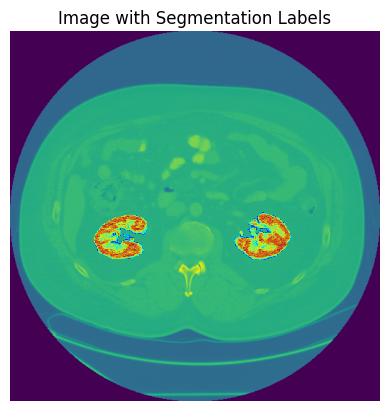

In [14]:
plot_image_and_annotation(nii_gz_dict['case_00019'], labels, 50)

## Prepare the dataset

In [15]:
print("Number of data:", len(nii_gz_dict.keys()))

Number of data: 489


In [16]:
from sklearn.model_selection import train_test_split

nii_gz_dict_train_keys, nii_gz_dict_test_keys = train_test_split(
    list(nii_gz_dict.keys()), 
    test_size=0.2, 
    random_state=42
)
print("Number of train data:", len(nii_gz_dict_train_keys))
print("Number of test data:", len(nii_gz_dict_test_keys))

Number of train data: 391
Number of test data: 98


## Create custom dataset class

In [17]:
nii_gz_dict['case_00006']

['kits23/dataset/case_00006/segmentation.nii.gz',
 'kits23/dataset/case_00006/imaging.nii.gz',
 'kits23/dataset/case_00006/instances/kidney_instance-2_annotation-2.nii.gz',
 'kits23/dataset/case_00006/instances/tumor_instance-1_annotation-1.nii.gz',
 'kits23/dataset/case_00006/instances/kidney_instance-1_annotation-1.nii.gz',
 'kits23/dataset/case_00006/instances/cyst_instance-1_annotation-3.nii.gz']

In [23]:
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

class Kits23Dataset(Dataset):
    def __init__(self, dataset_dir, transform=None, target_transform=None):
        self.nii_gz_dict, self.labels = self._get_nii_gz_data(dataset_dir)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.nii_gz_dict.keys())
    
    def _filter_dataset(self, file_list):
        filtered_files = []
        seen_prefixes = set()

        for file in file_list:
            # Skip files without "annotation"
            if "annotation" not in file:
                filtered_files.append(file)
                continue

            # Extract the prefix (e.g., "tumor_instance-1")
            match = re.search(r'(.*?)_annotation', file)
            if match:
                prefix = match.group(1)

                # Add the file if the prefix hasn't been seen before
                if prefix not in seen_prefixes:
                    filtered_files.append(file)
                    seen_prefixes.add(prefix)
        return filtered_files

    def _get_nii_gz_data(self, directory):
        """
        Finds all .nii.gz files within a directory, including subdirectories.

        Args:
            directory: The directory to search.

        Returns:
            nii_gz_dict: A list of paths to all .nii.gz files found in a dictionary.
            labels: A list of all labels found in the dataset.
        """

        nii_gz_dict = {}
        labels = []

        n_dir = len(directory.split("/"))
        if directory.split("/")[-1] == "":
            n_dir -= 1

        for root, _, files in os.walk(directory):
            if len(root.split("/")) > n_dir: # checks if the path is a subdirectory
                key = root.split("/")[n_dir] # gets the name of the subdirectory

                if key not in nii_gz_dict.keys():
                    nii_gz_dict[key] = [] # creates a new list for the new subdirectory

                for file in files: # Exclude hidden files (starting with '.')
                    if not file.startswith('.') and file.endswith(".nii.gz"):
                        nii_gz_dict[key].append(os.path.join(root, file))

                        # check if instance exist in the filename
                        if "instance" in file:
                            label = file.split("_")[0]
                            if label not in labels:
                                labels.append(label)

                # filter annotation files
                nii_gz_dict[key] = self._filter_dataset(nii_gz_dict[key])

        return nii_gz_dict, sorted(labels)
        
    def _get_paths(self, nii_gz_dict_paths):
        img_paths = []; annot_paths = []
        for paths in nii_gz_dict_paths:
            im_paths = []; an_paths = []
            for f in paths:
                if "imaging" in f:
                    im_paths.append(f)
                elif "annotation" in f:
                    an_paths.append(f)
            img_paths.append(im_paths)
            annot_paths.append(an_paths)
        return img_paths, annot_paths
    
    def _get_annots(self, annot_paths, image, n_slice):
        annot_cyst = np.zeros((n_slice, image.shape[1], image.shape[2]))
        annot_kidney = np.zeros((n_slice, image.shape[1], image.shape[2]))
        annot_tumor = np.zeros((n_slice, image.shape[1], image.shape[2]))

        for nii_gz_file in annot_paths:
            if "annotation" in nii_gz_file:
                annotation = nib.load(nii_gz_file).get_fdata()
                annotname = nii_gz_file.split("/")[-1]
                # add the annotation to the corresponding class
                if labels[0] in annotname:
                    annot_cyst = np.logical_or(annot_cyst, annotation)
                elif labels[1] in annotname:
                    annot_kidney = np.logical_or(annot_kidney, annotation)
                elif labels[2] in annotname:
                    annot_tumor = np.logical_or(annot_tumor, annotation)

        return np.stack(
            [
                annot_cyst, 
                annot_kidney, 
                annot_tumor
            ],
            axis=3
        ).astype(np.uint8)

    def __getitem__(self, idx):
        list_keys = list(self.nii_gz_dict.keys())
        case_keys = list_keys[idx]
        if isinstance(case_keys, str):
            nii_gz_dict_paths = [self.nii_gz_dict[case_keys]]
        elif isinstance(case_keys, list):
            nii_gz_dict_paths = [self.nii_gz_dict[k] for k in case_keys]
        else:
            raise TypeError("case_keys must be a string or a list of strings")
        
        list_img_paths, list_annot_paths = self._get_paths(nii_gz_dict_paths)
        
        images = []
        annotations = []
        for index, img_paths in enumerate(list_img_paths):
            # print(img_paths)
            for img_path in img_paths:
                # print(img_path)
                image = nib.load(img_path).get_fdata()
                image_min = image.min()
                image_max = image.max()
                image = (image - image_min) / (image_max - image_min) # Normalize image
                # print(image.shape)
                n_slice = image.shape[0]
                annotation = self._get_annots(list_annot_paths[index], image, n_slice)
                # print(annotation.shape)
            images.append(image)
            annotations.append(annotation)
        images = np.concatenate(images, axis=0)
        annotations = np.concatenate(annotations, axis=0)
        # print("*"*40)

        if self.transform:
            images = self.transform(images)
            images = torch.permute(images, (1,0,2)) # because ToTensor change shape (C,H,W) to (H,W,C)
        if self.target_transform:
            annotations = self.target_transform(annotations)
        return images, annotations

In [24]:
from torchvision.transforms import Compose, Normalize, ToTensor

dataset_dir = "kits23/dataset/"
# kits_dataset = Kits23Dataset(nii_gz_dict, labels)
# kits_dataset[10:12] # 10:13
transform = Compose(
    [
        ToTensor(),
        Normalize(mean=[0.5], std=[0.5]),
    ]
)
kits_dataset = Kits23Dataset(dataset_dir, transform=transform)
im, an = kits_dataset[11:13]
# print(im.shape)
# print(an.shape)

['kits23/dataset/case_00527/imaging.nii.gz']
kits23/dataset/case_00527/imaging.nii.gz
(35, 512, 512)
(35, 512, 512, 3)
['kits23/dataset/case_00143/imaging.nii.gz']
kits23/dataset/case_00143/imaging.nii.gz
(92, 512, 512)
(92, 512, 512, 3)
****************************************


In [22]:
im.shape

torch.Size([127, 512, 512])

In [20]:
print("as)

SyntaxError: unterminated string literal (detected at line 1) (1160531063.py, line 1)

In [ ]:
# split the dataset into train and test
test_size = 0.25
len_test = int(len(kits_dataset) * test_size)
len_train = len(kits_dataset) - len_test

kits_train, kits_val = torch.utils.data.random_split(
    kits_dataset, 
    [len_train, len_test]
)

In [ ]:
# im[0].unique()

In [ ]:
# torch.full((5,5))

## Build the model

In [ ]:
import torch
import torch.nn as nn
from tqdm import tqdm
from models.unet import UNET

In [ ]:
# # define train_loop
# def train_loop(model, loader, optim, loss_fn, scaler, pos_weight=False):
#     loop = tqdm(loader)
#     loss_20_batches = 0
#     loss_epoch = 0
#     for idx, (image, mask) in enumerate(loop):
#         # transferring data to cpu or gpu
#         image = image.to(DEVICE)
#         mask = mask.float().unsqueeze(dim=1).to(DEVICE)

#         # float16 training: reduces the load to the VRAM and speeds up the training
#         with torch.cuda.amp.autocast():
#             out = model(image)
#             if pos_weight:
#                 loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=(mask==0.).sum()/mask.sum())
#             loss = loss_fn(out, mask)
#             loss_20_batches += loss
#             loss_epoch += loss

#         # backpropagation
#         # check docs here https://pytorch.org/docs/stable/amp.html
#         optim.zero_grad()
#         scaler.scale(loss).backward()
#         scaler.step(optim)
#         scaler.update()

#         # update tqdm loop
#         if idx%20==0:  
#             loop.set_postfix(loss_20_batches=loss_20_batches.item()/20)
#             loss_20_batches = 0
            
#     print(
#         f"==> training_loss: {loss_epoch/len(loader):2f}"
#     )            
      
        
# def evalution_metrics(model,
#                       val_loader,
#                       loss_fn,
#                       device="cuda"):
#     num_correct = 0
#     num_pixels = 0
#     dice_score = 0
#     loss_epoch = 0
    
#     model.eval()
#     with torch.no_grad():
#         for idx, (image, mask) in enumerate(val_loader):
#             image = image.to(device)
#             mask = mask.float().unsqueeze(dim=1).to(DEVICE)
#             pred = model(image)

#             loss_epoch += loss_fn(pred, mask)
#             mask_pred = torch.sigmoid(pred)
#             mask_pred = (mask_pred > 0.5).float()

#             num_correct += (mask_pred == mask).sum()
#             num_pixels += torch.numel(mask_pred)
#             dice_score += (2 * (mask_pred * mask).sum()) / (
#                     (mask_pred + mask).sum() + 1e-8
#             )

#     print(
#         f"Got {num_correct}/{num_pixels} with acc {(num_correct/num_pixels)*100:.2f}"
#     )
#     print(
#         f"==> valuation_loss: {loss_epoch/len(val_loader):2f}"
#     )    

#     print(f"==> dice_score: {dice_score/len(val_loader)}")
    
#     model.train()
    
    
# def validation_recall(model,
#                       val_loader,
#                       device=DEVICE):
#     model.eval()
#     tot_recall = 0
#     with torch.no_grad():
#         for image, mask in val_loader:
#             image = image.to(device)
#             mask = mask.to(device).unsqueeze(dim=1)
#             out = torch.sigmoid(model(image))
#             out = np.array((out>0.5).cpu(), dtype=np.uint8).reshape(1,-1).squeeze()
#             mask = np.array(mask.cpu(), dtype=np.uint8).reshape(1,-1).squeeze()
#             recall_batch = recall_score(mask, out)
#             tot_recall += recall_batch
    
#     model.train()
#     print(f'Recall on validation set is: {tot_recall/len(val_loader)}')    


# def save_checkpoint(state, folder_path, filename="my_checkpoint.pth.tar"):
#     if not os.path.exists(folder_path):
#         os.makedirs(folder_path)
#     print("=> Saving checkpoint...")
#     torch.save(state, os.path.join(folder_path, filename))
    
    
# def load_model_checkpoint(checkpoint, model):
#     print("=> Loading model checkpoint...")
#     checkpoint = torch.load(checkpoint)
#     model.load_state_dict(checkpoint["state_dict"])    
    
# def load_optim_checkpoint(checkpoint, optim):
#     print("=> Loading optimizer checkpoint...")
#     checkpoint = torch.load(checkpoint)
#     optim.load_state_dict(checkpoint["optimizer"]) 


# def save_images(model, loader, folder, epoch, device, num_images, pad_mirroring):
#     print("=> Saving images...")

#     path = os.path.join(folder, f"epoch_{epoch + 1}")
#     if not os.path.exists(path):
#         os.makedirs(path)

#     model.eval()
    
#     with torch.no_grad():
#         for idx, (images, masks) in enumerate(loader):
#             if idx < num_images:
#                 images = images.to(device)
#                 outs = torch.sigmoid(model(images))
#                 outs = (outs > 0.5).float()
#                 if pad_mirroring:
#                     images = CenterCrop((IMAGE_HEIGHT, IMAGE_WIDTH))(images)
#                 # if the batch_size is > 1 we take just the first image/mask

#                 # plotting the first image/mask per batch
#                 image = images[0]
#                 mask = masks[0]
#                 out = outs[0]

#                 image = tens2image(image)
#                 mask = tens2image(mask)
#                 out = tens2image(out)

#                 img_gt = overlay_mask(inv_normalize(image), mask)
#                 img_out = overlay_mask(inv_normalize(image), out)

#                 fig = plt.figure(figsize=(10, 7))
#                 rows = 1
#                 columns = 2

#                 fig.add_subplot(rows, columns, 1)
#                 plt.imshow(img_gt)
#                 plt.axis('off')
#                 plt.title("Input image and ground_truth mask")

#                 fig.add_subplot(rows, columns, 2)
#                 plt.imshow(img_out)
#                 plt.axis('off')
#                 plt.title("Input image and predicted_mask")

#                 fig.savefig(f'{path}/image_{idx}.png')

#                 plt.cla()
#                 plt.close(fig)
                
#             else:
#                 break

#     model.train()
    

# def predict_image(model, image, val_transform, folder, image_title, pad_mirroring):
#     path = os.path.join(folder)
#     if not os.path.exists(path):
#         os.makedirs(path)
        
#     model.eval()
    
#     with torch.no_grad():
#         model = model.to(DEVICE)
#         image = val_transform(image=image)["image"].to(DEVICE).unsqueeze(dim=0)
#         if pad_mirroring:
#             image = Pad(padding=pad_mirroring, padding_mode="reflect")(image)
#         start = time.time()
#         mask = torch.sigmoid(model(image))
#         mask = (mask > 0.5).float()
#         end = time.time()
#         print("Inference time is {:2f}".format(end-start))

#         if pad_mirroring:
#             image = CenterCrop((IMAGE_HEIGHT, IMAGE_WIDTH))(image)
#         image = tens2image(image)
#         mask = tens2image(mask)
#         pred = overlay_mask(inv_normalize(image), mask)


#         fig = plt.figure(figsize=(10, 7))
#         plt.imshow(pred)
#         plt.axis('off')
#         plt.title("Test Prediction")
        
#         fig.savefig(f"{path}/{image_title}.jpg")

In [ ]:
def collate_fn(data):
    """
    data: is a list of tuples with (example, label, length)
            where 'example' is a tensor of arbitrary shape
            and label/length are scalars
    """
    images, labels = zip(*data)
    # print("check type:", type(images), type(labels))
    # print("check length:", len(images), len(labels))
    new_images = []
    for slices_img in images:
        for img in slices_img:
            img = np.expand_dims(img, axis=0)
            img = torch.tensor(img)
            new_images.append(img)
            # print("collate_fn", img.shape)

    new_labels = []
    for slices_lab in labels:
        for lab in slices_lab:
            lab = np.expand_dims(lab, axis=0)
            lab = torch.tensor(lab).permute(0,3,1,2)
            new_labels.append(lab)
    # print("wkwkwkwk")
    return new_images, new_labels


In [ ]:
# print(sd")

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
EPOCHS = 10
LEARNING_RATE = 0.0001
SAVE_MODEL_PATH = "results/"
SAVE_IMAGES_PATH = "results/images/"
PAD_MIRRORING = True


train_dataloader = torch.utils.data.DataLoader(
    kits_train, 
    collate_fn=collate_fn, 
    batch_size=1,
    shuffle=True, 
    num_workers=0
)
val_dataloader = torch.utils.data.DataLoader(
    kits_val, 
    collate_fn=collate_fn, 
    batch_size=1,
    shuffle=False, 
    num_workers=0
)
loop_train = tqdm(train_dataloader)
loop_val = tqdm(val_dataloader)

  0%|          | 0/368 [00:00<?, ?it/s]

In [ ]:
# source: https://medium.com/@alessandromondin/semantic-segmentation-with-pytorch-u-net-from-scratch-502d6565910a

loss_fn = torch.nn.BCEWithLogitsLoss()
scaler = torch.cuda.amp.GradScaler()

from models.single_module_unet import UNet
from utils.dice_score import dice_loss

model = UNet(
    in_channels=1,
    n_class=3
).to(DEVICE)
# model = UNET(
#     in_channels=1, 
#     first_out_channels=64, 
#     exit_channels=3, 
#     padding=0, 
#     downhill=4
# ).to(DEVICE)

# set up the optimizer, the categorical loss, the learning rate scheduler
# optimizer = torch.optim.RMSprop(
#     model.parameters(),
#     # lr=config.LEARNING_RATE,
#     # weight_decay=config.WEIGHT_DECAY,
#     # momentum=config.MOMENTUM,
#     foreach=True,
# )
optimizer = torch.optim.Adam(
    model.parameters(), 
    lr=LEARNING_RATE
)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    "max", 
    patience=5
)  # goal: maximize Dice score
criterion = nn.CrossEntropyLoss()

pos_weight = False

for epoch in range(EPOCHS):
    loss_epoch = 0
    val_loss_epoch = 0
    print(f"Epoch: {epoch + 1}/{EPOCHS}")

    model.train()
    outs = []
    for idx, (images, masks) in enumerate(train_dataloader):
        count = 0
        for id_img, image in enumerate(images):
            image = image.float().unsqueeze(0).to(DEVICE)
            mask = masks[id_img].float().to(DEVICE)

            assert image.shape[-1] == image.shape[-2], \
                f"image dimensions do not match! {image.shape[-1]} and {image.shape[-2]}"
            assert mask.shape[-1] == mask.shape[-2], \
                f"mask dimensions do not match! {mask.shape[-1]} and {mask.shape[-2]}"

            # float16 training: reduces the load to the VRAM and speeds up the training
            # with torch.cuda.amp.autocast():
            out = model(image)
            outs.append(out)
            
            bs = 6
            if len(outs) == bs or id_img + 1 == len(images):
                outs = torch.cat(outs, dim=0).to(DEVICE)
                targets = torch.cat(masks[count:count+bs], dim=0).float().to(DEVICE)
                # print(outs.shape)
                # print(targets.shape)

                try:
                    loss = criterion(outs, targets)
                except:
                    print("Error nich!", outs.shape, targets.shape)
                # loss += dice_loss(
                #     # nn.functional.softmax(out, dim=1).float(),
                #     # nn.functional.one_hot(mask, num_classes=3).float(),
                #     out, mask,
                #     multiclass=True
                # )

                # zero the gradients
                optimizer.zero_grad(set_to_none=True)
                # backpropagate the loss
                loss.backward()
                # clip the gradients to prevent exploding gradients
                # torch.nn.utils.clip_grad_norm_(model.parameters(), config.GRADIENT_CLIPPING)
                # update the weights
                optimizer.step()
                loss_epoch += loss.item()
                # print("loss", loss_epoch)

                # empty the output list
                outs = []
                count += bs
        print(f"Iter {idx+1}/{len(train_dataloader)} - Current training loss: {loss_epoch:5f}")

        if idx == 9:
            outs = []
            break

    # evaluation on validation set
    model.eval()
    with torch.no_grad():
        for idx, (val_images, val_masks) in enumerate(val_dataloader):
            val_count = 0
            for id_img, val_image in enumerate(val_images):
                val_image = val_image.float().unsqueeze(0).to(DEVICE)
                val_mask = val_masks[id_img].float().to(DEVICE)

                assert val_image.shape[-1] == val_image.shape[-2], "image dimensions do not match!"
                assert val_mask.shape[-1] == val_mask.shape[-2], "mask dimensions do not match!"

                val_out = model(val_image)
                loss = criterion(val_out, val_mask)
                val_loss_epoch += loss.item()
            print(f"Iter {idx+1}/{len(val_dataloader)} - Current validation loss: {val_loss_epoch:5f}")

            if idx == 9:
                break

    print(f"\n\nEpoch {epoch+1}/{EPOCHS} - Current training loss: {loss_epoch}")
    print(f"Epoch {epoch+1}/{EPOCHS} - Current validation loss: {val_loss_epoch}\n\n")



Epoch: 1/10
Iter 1/368 - Current training loss: 0.080086
Iter 2/368 - Current training loss: 0.744430
Iter 3/368 - Current training loss: 1.286864
Iter 4/368 - Current training loss: 1.426440
Iter 5/368 - Current training loss: 1.620780
Iter 6/368 - Current training loss: 2.024426
Iter 7/368 - Current training loss: 2.093067
Iter 8/368 - Current training loss: 2.154188
Iter 9/368 - Current training loss: 2.196310
Iter 10/368 - Current training loss: 2.238750
Iter 1/122 - Current validation loss: 0.153170
Iter 2/122 - Current validation loss: 0.249450
Iter 3/122 - Current validation loss: 0.328058
Iter 4/122 - Current validation loss: 0.461755
Iter 5/122 - Current validation loss: 1.666643
Iter 6/122 - Current validation loss: 1.820102
Iter 7/122 - Current validation loss: 2.037962
Iter 8/122 - Current validation loss: 3.859312
Iter 9/122 - Current validation loss: 7.681056
Iter 10/122 - Current validation loss: 10.594733


Epoch 1/10 - Current training loss: 2.2387497787506145
Epoch 1/

KeyboardInterrupt: 

In [ ]:
dice_loss(out, mask, multiclass=True)
# torch.cat(images, axis=0).shape
# model(torch.cat(images, axis=0).float().to(DEVICE))

tensor(0.9936, device='cuda:0', grad_fn=<RsubBackward1>)

In [ ]:
# for epoch in range(10, EPOCHS):
#     print(f"Training epoch {epoch+1}/{EPOCHS}")

#     train_loop(model=model, loader=train_loader, loss_fn=loss_fn, optim=optim, scaler=scaler, pos_weight=False)
    
#     print("Computing dice_loss on val_loader...")
    
#     evalution_metrics(model, val_loader, loss_fn, device=DEVICE)

#     checkpoint = {
#         "state_dict": model.state_dict(),
#         "optimizer": optim.state_dict(),
#     }
    
#     save_checkpoint(checkpoint, folder_path=SAVE_MODEL_PATH,
#                     filename=f"checkpoint_epoch_{epoch+1}.pth.tar")

#     save_images(model=model, loader=val_loader, folder=SAVE_IMAGES_PATH,
#                 epoch=epoch, device=DEVICE, num_images=10, pad_mirroring=PAD_MIRRORING)

In [ ]:
torch.__version__

'2.3.0+cu121'